## Advanced Lane Finding Project

Goals:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


## Camera Calibration

OpenCV functions or other methods were used to calculate the correct camera matrix and distortion coefficients using the calibration chessboard images provided in the repository (note these are 9x6 chessboard images, unlike the 8x6 images used in the lesson). The distortion matrix should be used to un-distort one of the calibration images provided as a demonstration that the calibration is correct. Example of undistorted calibration image is Included in the writeup (or saved to a folder).

#### Imports

In [6]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
import os
from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline

In [7]:
# Reference: 
# - https://github.com/udacity/CarND-Camera-Calibration/blob/master/camera_calibration.ipynb

out_dir='../output_images/'

# ############# Make a list of calibration images   ######
images = list(map(lambda imageFileName: (imageFileName, cv2.imread(imageFileName)), glob.glob('../camera_cal/c*.jpg')))

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
undistortedimages = []
originalimages = []

# Step through the list and search for chessboard corners
for image in images:
    filename, image = image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    ############### change chessboard size to 9x6 instead of 8x6. ###############
    for ny in [5,6]:
        for nx in [6,7,8,9]:
            # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
            objp = np.zeros((ny*nx,3), np.float32)
            objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

            # Find the chessboard corners
            ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

            # If found, add object points, image points
            if ret == True:
                imgpoints.append(corners)
                objpoints.append(objp)

                # Draw and display the corners
                img_points = cv2.drawChessboardCorners(image.copy(), (nx,ny), corners, ret)
                undistortedimages.append(img_points)
                originalimages.append(image)
                image_name=os.path.split(filename)[1]
                write_name = out_dir+'corner_'+str(ny)+'_x_'+str(nx)+'_'+image_name
                print(write_name)
                cv2.imwrite(write_name, img_points)
                
print('Found {} image with corner.'.format(len(undistortedimages)))

../output_images/corner_5_x_9_calibration1.jpg
../output_images/corner_6_x_9_calibration10.jpg
../output_images/corner_6_x_9_calibration11.jpg
../output_images/corner_6_x_9_calibration12.jpg
../output_images/corner_6_x_9_calibration13.jpg
../output_images/corner_6_x_8_calibration14.jpg
../output_images/corner_6_x_9_calibration14.jpg
../output_images/corner_5_x_6_calibration15.jpg
../output_images/corner_6_x_6_calibration15.jpg
../output_images/corner_6_x_9_calibration15.jpg
../output_images/corner_6_x_9_calibration16.jpg
../output_images/corner_6_x_9_calibration17.jpg
../output_images/corner_6_x_9_calibration18.jpg
../output_images/corner_6_x_9_calibration19.jpg
../output_images/corner_6_x_8_calibration2.jpg
../output_images/corner_6_x_9_calibration2.jpg
../output_images/corner_6_x_9_calibration20.jpg
../output_images/corner_6_x_9_calibration3.jpg
../output_images/corner_5_x_6_calibration4.jpg
../output_images/corner_5_x_7_calibration5.jpg
../output_images/corner_6_x_7_calibration5.jpg

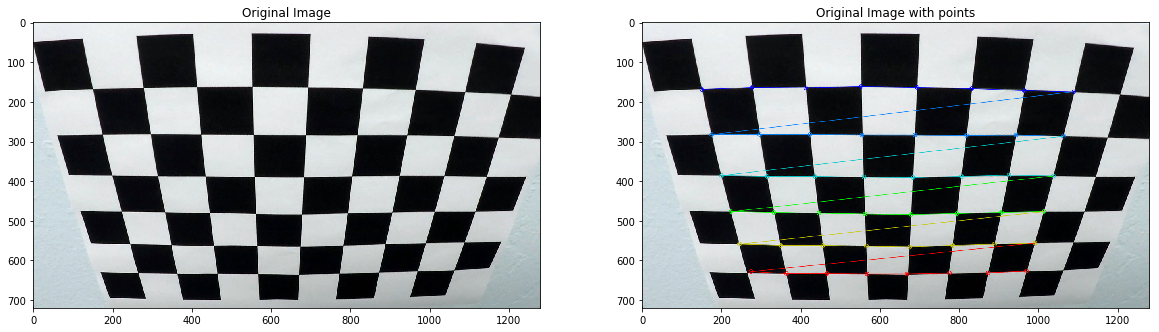

In [8]:
index = 14
original = originalimages[index]
chessPoints = undistortedimages[index]
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(original)
axes[0].set_title('Original Image')
axes[1].imshow(chessPoints)
axes[1].set_title('Original Image with points')

In [9]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, original.shape[0:2], None, None)
pickle.dump( { 'mtx': mtx, 'dist': dist }, open('../camera_calibration_pickle.p', 'wb'))

In [10]:
# Load pickled distortion matrix
with open('../camera_calibration_pickle.p', mode='rb') as f:
    dist_pickle = pickle.load(f)
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]

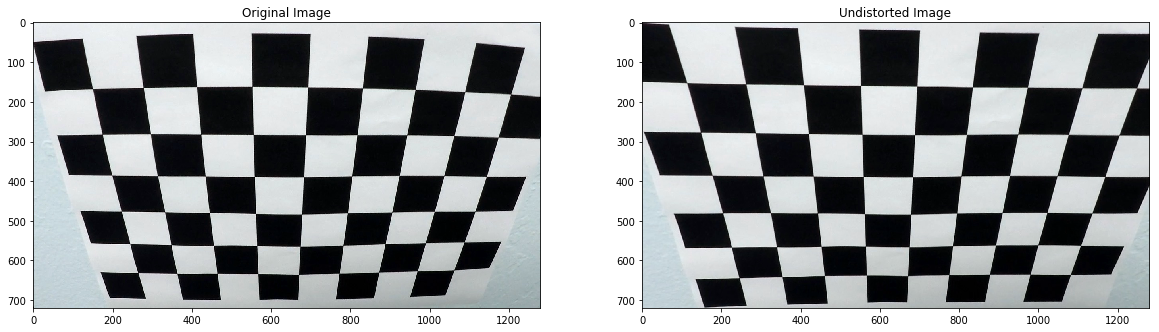

In [11]:
    
# Visualize undistortion
undist = cv2.undistort(original, mtx, dist, None, mtx)

fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(original)
axes[0].set_title('Original Image')
axes[1].imshow(undist)
axes[1].set_title('Undistorted Image')

In [12]:
# Step through the list and search for chessboard corners
for image in images:
    fileName, image = image
    # Visualize undistortion on test images
    dst = cv2.undistort(image, mtx, dist, None, mtx)
    image_name=os.path.split(fileName)[1]
    write_name = out_dir+'undistorted_'+image_name
    cv2.imwrite(write_name,dst)
    print(write_name)

../output_images/undistorted_calibration1.jpg
../output_images/undistorted_calibration10.jpg
../output_images/undistorted_calibration11.jpg
../output_images/undistorted_calibration12.jpg
../output_images/undistorted_calibration13.jpg
../output_images/undistorted_calibration14.jpg
../output_images/undistorted_calibration15.jpg
../output_images/undistorted_calibration16.jpg
../output_images/undistorted_calibration17.jpg
../output_images/undistorted_calibration18.jpg
../output_images/undistorted_calibration19.jpg
../output_images/undistorted_calibration2.jpg
../output_images/undistorted_calibration20.jpg
../output_images/undistorted_calibration3.jpg
../output_images/undistorted_calibration4.jpg
../output_images/undistorted_calibration5.jpg
../output_images/undistorted_calibration6.jpg
../output_images/undistorted_calibration7.jpg
../output_images/undistorted_calibration8.jpg
../output_images/undistorted_calibration9.jpg


## Pipeline (test images)

Distortion correction that was calculated via camera calibration has been correctly applied to each image. An example of a distortion corrected image should be included in the writeup (or saved to a folder) and submitted with the project.

In [13]:
# Load test images.
testimages = list(map(lambda imageFileName: (imageFileName, cv2.imread(imageFileName)), 
                      glob.glob('../test_images/*.jpg')))

## Distortion correction

In [14]:
# Use calibration matrix to undistort image
def undistort(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

In [15]:
testoriginalimages = []
testundistortedimages = []
# Step through the list and search for chessboard corners
for image in testimages:
    fileName, image = image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Visualize undistortion on test images
    dst = undistort(image)
    image_name=os.path.split(fileName)[1]
    write_name = out_dir+'undistorted_'+image_name
    cv2.imwrite(write_name,dst)
    testoriginalimages.append(image)
    testundistortedimages.append(dst)
    print(write_name)

../output_images/undistorted_straight_lines1.jpg
../output_images/undistorted_straight_lines2.jpg
../output_images/undistorted_test1.jpg
../output_images/undistorted_test2.jpg
../output_images/undistorted_test3.jpg
../output_images/undistorted_test4.jpg
../output_images/undistorted_test5.jpg
../output_images/undistorted_test6.jpg


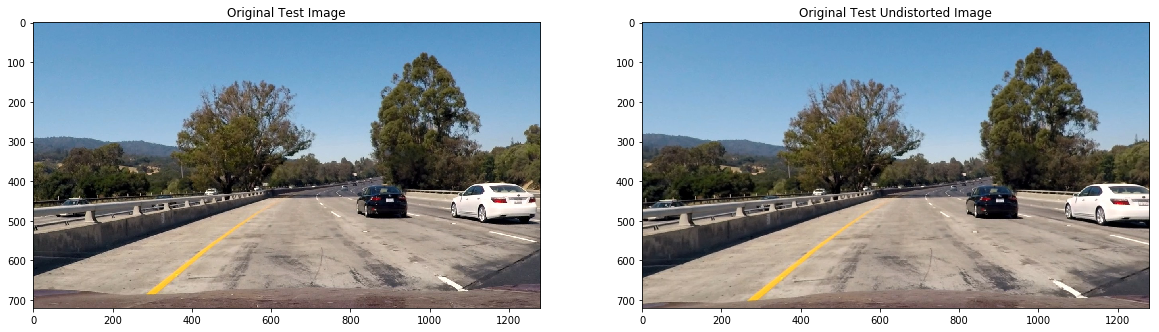

In [16]:
index = 2
testoriginal= testoriginalimages[index]
testundistorted = testundistortedimages[index]
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(testoriginal)
axes[0].set_title('Original Test Image')
axes[1].imshow(testundistorted)
axes[1].set_title('Original Test Undistorted Image')

## Color/gradient threshold
Use color transforms, gradients, etc., to create a thresholded binary image. 